# Audio Data Preparation

In [1]:
import os
from glob import glob
from pathlib import Path
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

## Setup

### Paths

In [2]:
# Audio features dataset
input_path_egemaps = '../../1.feature_extraction/out/audio/egemaps/'
input_path_gemaps = '../../1.feature_extraction/out/audio/gemaps/'

# CSV output
output_path_egemaps = '../out/audio/egemaps/'
output_path_gemaps = '../out/audio/gemaps/'

# Global configuration path
glob_conf_path = '../../config/global_config_paper.py'

### Load global variables

In [3]:
exec(open(glob_conf_path).read())

## Concatenate all csv files

In [4]:
csv_paths_egemaps = glob(input_path_egemaps +  '*.csv')
print("Files found (eGeMAPS):",len(csv_paths_egemaps))

csv_paths_gemaps = glob(input_path_gemaps +  '*.csv')
print("Files found (GeMAPS):",len(csv_paths_gemaps))

Files found (eGeMAPS): 1260
Files found (GeMAPS): 1260


### Concatenating eGeMAPS features

In [7]:
df_egemaps = pd.DataFrame()

for f in tqdm(csv_paths_egemaps):
    df_tmp = pd.read_csv(f,sep=';')
    
    file_name  = Path(f).stem      # Get file name without extention
    actor_id   = file_name[14:16]  # Get actor number id
    emotion_id = file_name[16:19]  # Get emotion id
    _          = file_name[19:]    # Get number after emotion
    
    df_tmp["actor_id"]   = actor_id                          # Add actor id to the df
    df_tmp["emotion_id"] = emotion_id                        # Add emotion id to the df
    df_tmp["emotion"]    = emotion_id_to_emotion[emotion_id] # Add emotion to the df
    df_tmp["file"]       = Path(f).name                      # Add file name to the df 
    
    df_egemaps = df_egemaps.append(df_tmp)

df_egemaps["file_id"] = pd.factorize(df_egemaps.file, sort=True)[0] # Add a column with a file id (number)
df_egemaps.sort_values(by=['file_id'], ignore_index=True, inplace=True)

df_egemaps.to_csv(output_path_egemaps + 'audio_data_step_0_egemaps_full_dataset.csv', index=None, header=True)

# Save mapping from video file to file id
df_files_egemaps = df_egemaps[['file_id','file']].drop_duplicates()
df_files_egemaps.to_csv(output_path_egemaps + 'audio_data_step_0_egemaps_file_id_mapping.csv', index=None, header=True)

100%|██████████| 1260/1260 [00:19<00:00, 65.60it/s]


In [8]:
df_egemaps

,frameIndex,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,actor_id,emotion_id,emotion,file,file_id
0,0,0.0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,...,0.266000,0.240217,0.066000,0.063119,-24.38904,01,amu,amusement,egemaps_norm_A01amu111.csv,0
1,0,0.0,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,...,0.383333,0.182635,0.080000,0.000000,-24.52001,01,amu,amusement,egemaps_norm_A01amu112.csv,1
2,0,0.0,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,...,0.274000,0.184673,0.070000,0.035590,-24.13003,01,amu,amusement,egemaps_norm_A01amu121.csv,2
3,0,0.0,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,...,0.282500,0.153195,0.063333,0.028674,-23.08461,01,amu,amusement,egemaps_norm_A01amu124.csv,3
4,0,0.0,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,...,0.610000,0.657926,0.063333,0.041899,-23.62944,01,amu,amusement,egemaps_norm_A01amu133.csv,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,0.0,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,...,0.446667,0.133000,0.120000,0.090921,-25.23524,10,tri,sadness,egemaps_norm_A10tri216.csv,1255
1256,0,0.0,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,...,0.176667,0.185927,0.106429,0.068620,-23.72039,10,tri,sadness,egemaps_norm_A10tri317.csv,1256
1257,0,0.0,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,...,0.172941,0.220794,0.126875,0.105695,-23.15614,10,tri,sadness,egemaps_norm_A10tri319.csv,1257
1258,0,0.0,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,...,0.440000,0.158955,0.185000,0.191638,-24.59979,10,tri,sadness,egemaps_norm_A10tri4118.csv,1258


### Concatenating GeMAPS features

In [9]:
df_gemaps = pd.DataFrame()

for f in tqdm(csv_paths_gemaps):
    df_tmp = pd.read_csv(f, sep=';')
    
    file_name  = Path(f).stem      # Get file name without extention
    actor_id   = file_name[13:15]  # Get actor number id
    emotion_id = file_name[15:18]  # Get emotion id
    _          = file_name[18:]    # Get number after emotion
    
    df_tmp["actor_id"]   = actor_id                          # Add actor id to the df
    df_tmp["emotion_id"] = emotion_id                        # Add emotion id to the df
    df_tmp["emotion"]    = emotion_id_to_emotion[emotion_id] # Add emotion to the df
    df_tmp["file"]       = Path(f).name                      # Add file name to the df 
    
    df_gemaps = df_gemaps.append(df_tmp)

df_gemaps["file_id"] = pd.factorize(df_gemaps.file, sort=True)[0] # Add a column with a file id (number)
df_gemaps.sort_values(by=['file_id'], ignore_index=True, inplace=True)
df_gemaps.to_csv(output_path_gemaps + 'audio_data_step_0_gemaps_full_dataset.csv', index=None, header=True)

# Save mapping from video file to file id
df_files_gemaps = df_gemaps[['file_id','file']].drop_duplicates()
df_files_gemaps.to_csv(output_path_gemaps + 'audio_data_step_0_gemaps_file_id_mapping.csv', index=None, header=True)

100%|██████████| 1260/1260 [00:18<00:00, 68.43it/s]


In [10]:
df_gemaps

,frameIndex,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,actor_id,emotion_id,emotion,file,file_id
0,0,0.0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,...,2.824859,0.266000,0.240217,0.066000,0.063119,01,amu,amusement,gemaps_norm_A01amu111.csv,0
1,0,0.0,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,...,2.290076,0.383333,0.182635,0.080000,0.000000,01,amu,amusement,gemaps_norm_A01amu112.csv,1
2,0,0.0,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,...,2.941177,0.274000,0.184673,0.070000,0.035590,01,amu,amusement,gemaps_norm_A01amu121.csv,2
3,0,0.0,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,...,2.877698,0.282500,0.153195,0.063333,0.028674,01,amu,amusement,gemaps_norm_A01amu124.csv,3
4,0,0.0,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,...,1.456311,0.610000,0.657926,0.063333,0.041899,01,amu,amusement,gemaps_norm_A01amu133.csv,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,0.0,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,...,1.704545,0.446667,0.133000,0.120000,0.090921,10,tri,sadness,gemaps_norm_A10tri216.csv,1255
1256,0,0.0,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,...,3.355705,0.176667,0.185927,0.106429,0.068620,10,tri,sadness,gemaps_norm_A10tri317.csv,1256
1257,0,0.0,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,...,3.195489,0.172941,0.220794,0.126875,0.105695,10,tri,sadness,gemaps_norm_A10tri319.csv,1257
1258,0,0.0,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,...,1.408451,0.440000,0.158955,0.185000,0.191638,10,tri,sadness,gemaps_norm_A10tri4118.csv,1258


## Data cleaning

### Data inspection before data cleaning

In this section we will inspect the dataset. For this porpuse, we will focus on the following elements:

* Number of files per emotion

#### eGeMAPS

Files per emotion before data cleaning
Total number of files: 1260
emotion_id
adm    30
amu    90
att    30
col    90
deg    30
des    90
fie    90
hon    30
inq    90
int    90
irr    90
joi    90
mep    30
peu    90
pla    90
sou    90
sur    30
tri    90
Name: file, dtype: int64


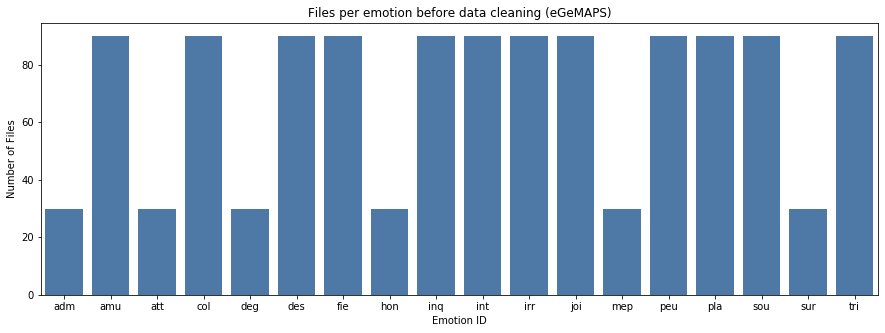

In [10]:
# Load csv
df = pd.read_csv(output_path_egemaps + 'audio_data_step_0_egemaps_full_dataset.csv')

print('Files per emotion before data cleaning')
files_per_emotion_count_original = df[['emotion_id','file']].groupby(['emotion_id']).file.nunique()
print('Total number of files: {}'.format(files_per_emotion_count_original.sum()))
print(files_per_emotion_count_original)
plt.figure(figsize=(15,5))
sns.barplot(files_per_emotion_count_original.index, files_per_emotion_count_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title('Files per emotion before data cleaning (eGeMAPS)')
plt.xlabel('Emotion ID')
plt.ylabel('Number of Files')
plt.show()
print()

#### GeMAPS

Files per emotion before data cleaning
Total number of files: 1260
emotion_id
adm    30
amu    90
att    30
col    90
deg    30
des    90
fie    90
hon    30
inq    90
int    90
irr    90
joi    90
mep    30
peu    90
pla    90
sou    90
sur    30
tri    90
Name: file, dtype: int64


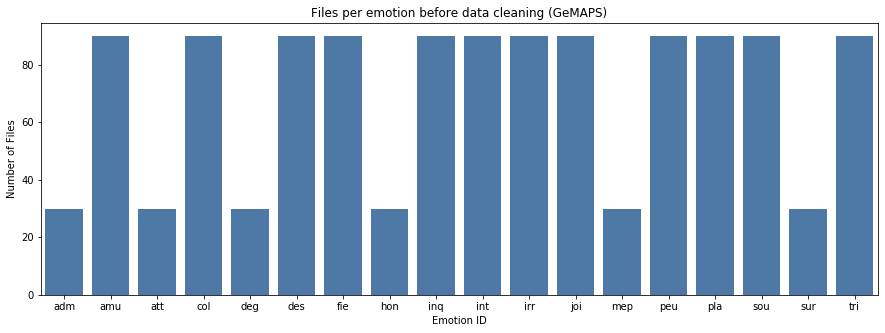

In [11]:
# Load csv
df = pd.read_csv(output_path_gemaps + 'audio_data_step_0_gemaps_full_dataset.csv')

print('Files per emotion before data cleaning')
files_per_emotion_count_original = df[['emotion_id','file']].groupby(['emotion_id']).file.nunique()
print('Total number of files: {}'.format(files_per_emotion_count_original.sum()))
print(files_per_emotion_count_original)
plt.figure(figsize=(15,5))
sns.barplot(files_per_emotion_count_original.index, files_per_emotion_count_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title('Files per emotion before data cleaning (GeMAPS)')
plt.xlabel('Emotion ID')
plt.ylabel('Number of Files')
plt.show()
print()

#### Look for null values

In [12]:
df_egemaps.replace(r'^\s*$', np.nan, regex=True)
print("Are there any null values in the eGeMAPS dataset?",df_egemaps.isnull().values.any())

df_gemaps.replace(r'^\s*$', np.nan, regex=True)
print("Are there any null values in the GeMAPS dataset?",df_gemaps.isnull().values.any())

Are there any null values in the eGeMAPS dataset? False
Are there any null values in the GeMAPS dataset? False


### Remove some instances
One file was deleted after the video data cleaning, hence the corresponding audio instance needs to be dropped from the audio dataset.

#### eGeMAPS

In [14]:
df_egemaps[df_egemaps['file'] == 'egemaps_norm_A05int132.csv' ]

,frameIndex,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,actor_id,emotion_id,emotion,file,file_id
563,0,0.0,19.15213,0.198332,17.26127,18.71836,23.14464,5.883369,19.44014,12.68781,...,0.17125,0.34783,0.05375,0.040601,-27.3362,05,int,interest,egemaps_norm_A05int132.csv,563


In [45]:
egemaps_before_cleaning_df = pd.read_csv(output_path_egemaps + 'audio_data_step_0_egemaps_full_dataset.csv')
egemaps_after_cleaning_df  = egemaps_before_cleaning_df.drop(egemaps_before_cleaning_df[egemaps_before_cleaning_df['file'] == 'egemaps_norm_A05int132.csv'].index)
egemaps_after_cleaning_df.to_csv(output_path_egemaps + 'audio_data_step_1_egemaps_data_cleaning.csv', index=None, header=True)
print('Number of files before data cleaning (eGeMAPS): {}'.format(len(egemaps_before_cleaning_df)))
print('Number of files after data cleaning (eGeMAPS): {}'.format(len(egemaps_after_cleaning_df)))


gemaps_before_cleaning_df = pd.read_csv(output_path_gemaps + 'audio_data_step_0_gemaps_full_dataset.csv')
gemaps_after_cleaning_df = gemaps_before_cleaning_df.drop(gemaps_before_cleaning_df[gemaps_before_cleaning_df['file'] == 'gemaps_norm_A05int132.csv'].index)
gemaps_after_cleaning_df.to_csv(output_path_gemaps + 'audio_data_step_1_gemaps_data_cleaning.csv', index=None, header=True)
print('Number of files before data cleaning (GeMAPS): {}'.format(len(gemaps_before_cleaning_df)))
print('Number of files after data cleaning (GeMAPS): {}'.format(len(gemaps_after_cleaning_df)))


Number of files before data cleaning (eGeMAPS): 1260
Number of files after data cleaning (eGeMAPS): 1259
Number of files before data cleaning (GeMAPS): 1260
Number of files after data cleaning (GeMAPS): 1259


In [46]:
gemaps_after_cleaning_df

,frameIndex,frameTime,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,actor_id,emotion_id,emotion,file,file_id
0,0,0.0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,...,2.824859,0.266000,0.240217,0.066000,0.063119,1,amu,amusement,gemaps_norm_A01amu111.csv,0
1,0,0.0,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,...,2.290076,0.383333,0.182635,0.080000,0.000000,1,amu,amusement,gemaps_norm_A01amu112.csv,1
2,0,0.0,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,...,2.941177,0.274000,0.184673,0.070000,0.035590,1,amu,amusement,gemaps_norm_A01amu121.csv,2
3,0,0.0,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,...,2.877698,0.282500,0.153195,0.063333,0.028674,1,amu,amusement,gemaps_norm_A01amu124.csv,3
4,0,0.0,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,...,1.456311,0.610000,0.657926,0.063333,0.041899,1,amu,amusement,gemaps_norm_A01amu133.csv,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,0.0,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,...,1.704545,0.446667,0.133000,0.120000,0.090921,10,tri,sadness,gemaps_norm_A10tri216.csv,1255
1256,0,0.0,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,...,3.355705,0.176667,0.185927,0.106429,0.068620,10,tri,sadness,gemaps_norm_A10tri317.csv,1256
1257,0,0.0,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,...,3.195489,0.172941,0.220794,0.126875,0.105695,10,tri,sadness,gemaps_norm_A10tri319.csv,1257
1258,0,0.0,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,...,1.408451,0.440000,0.158955,0.185000,0.191638,10,tri,sadness,gemaps_norm_A10tri4118.csv,1258


### Data inspection after data cleaning

#### eGeMAPS

Files per emotion after data cleaning
Total number of files: 1259
emotion_id
adm    30
amu    90
att    30
col    90
deg    30
des    90
fie    90
hon    30
inq    90
int    89
irr    90
joi    90
mep    30
peu    90
pla    90
sou    90
sur    30
tri    90
Name: file, dtype: int64


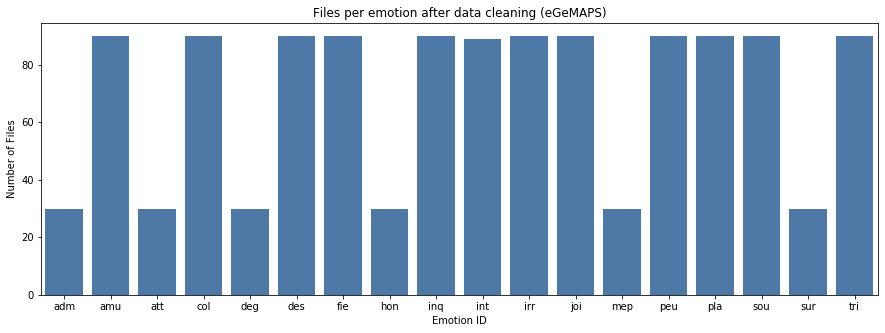

In [16]:
# Load csv
df = pd.read_csv(output_path_egemaps + 'audio_data_step_1_egemaps_data_cleaning.csv')

print('Files per emotion after data cleaning')
files_per_emotion_count_original = df[['emotion_id','file']].groupby(['emotion_id']).file.nunique()
print('Total number of files: {}'.format(files_per_emotion_count_original.sum()))
print(files_per_emotion_count_original)
plt.figure(figsize=(15,5))
sns.barplot(files_per_emotion_count_original.index, files_per_emotion_count_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title('Files per emotion after data cleaning (eGeMAPS)')
plt.xlabel('Emotion ID')
plt.ylabel('Number of Files')
plt.show()
print()

#### GeMAPS

Files per emotion after data cleaning
Total number of files: 1259
emotion_id
adm    30
amu    90
att    30
col    90
deg    30
des    90
fie    90
hon    30
inq    90
int    89
irr    90
joi    90
mep    30
peu    90
pla    90
sou    90
sur    30
tri    90
Name: file, dtype: int64


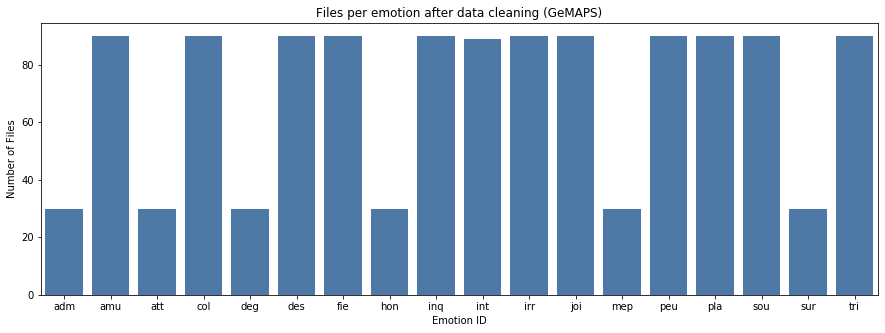

In [17]:
# Load csv
df = pd.read_csv(output_path_gemaps + 'audio_data_step_1_gemaps_data_cleaning.csv')

print('Files per emotion after data cleaning')
files_per_emotion_count_original = df[['emotion_id','file']].groupby(['emotion_id']).file.nunique()
print('Total number of files: {}'.format(files_per_emotion_count_original.sum()))
print(files_per_emotion_count_original)
plt.figure(figsize=(15,5))
sns.barplot(files_per_emotion_count_original.index, files_per_emotion_count_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title('Files per emotion after data cleaning (GeMAPS)')
plt.xlabel('Emotion ID')
plt.ylabel('Number of Files')
plt.show()
print()

## Dimensionality reduction

In this section, we will reduce the dimensionality of our dataset by manually selecting relevant features for our sample (feature selection). But first, we will see what kinds of dimensions we have in the dataset.

In [16]:
df_egemaps = pd.read_csv(output_path_egemaps + 'audio_data_step_1_egemaps_data_cleaning.csv')
df_gemaps = pd.read_csv(output_path_gemaps + 'audio_data_step_1_gemaps_data_cleaning.csv')

df_egemaps = df_egemaps.drop(columns=['frameIndex', 'frameTime', 'emotion', 'file'])
df_gemaps = df_gemaps.drop(columns=['frameIndex', 'frameTime', 'emotion', 'file'])


df_egemaps.to_csv(output_path_egemaps + 'audio_data_step_2_egemaps_dimensionality_reduction.csv', index=None, header=True)
df_gemaps.to_csv(output_path_gemaps + 'audio_data_step_2_gemaps_dimensionality_reduction.csv', index=None, header=True)

In [17]:
df_egemaps

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,actor_id,emotion_id,file_id
0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,115.02070,99.92057,...,5.978261,2.824859,0.266000,0.240217,0.066000,0.063119,-24.38904,1,amu,0
1,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,125.66140,97.40245,...,6.569343,2.290076,0.383333,0.182635,0.080000,0.000000,-24.52001,1,amu,1
2,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,204.02830,288.77620,...,5.113636,2.941177,0.274000,0.184673,0.070000,0.035590,-24.13003,1,amu,2
3,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,45.30075,58.10585,...,5.517241,2.877698,0.282500,0.153195,0.063333,0.028674,-23.08461,1,amu,3
4,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,109.65090,62.87440,...,5.045871,1.456311,0.610000,0.657926,0.063333,0.041899,-23.62944,1,amu,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,21.36834,12.65029,...,3.867404,1.704545,0.446667,0.133000,0.120000,0.090921,-25.23524,10,tri,1255
1255,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,55.19181,21.31094,...,1.754386,3.355705,0.176667,0.185927,0.106429,0.068620,-23.72039,10,tri,1256
1256,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,86.19820,86.14408,...,1.675978,3.195489,0.172941,0.220794,0.126875,0.105695,-23.15614,10,tri,1257
1257,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,13.97614,8.37091,...,2.752294,1.408451,0.440000,0.158955,0.185000,0.191638,-24.59979,10,tri,1258


In [18]:
df_gemaps

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,actor_id,emotion_id,file_id
0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,115.02070,99.92057,...,-0.011299,5.978261,2.824859,0.266000,0.240217,0.066000,0.063119,1,amu,0
1,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,125.66140,97.40245,...,-0.004146,6.569343,2.290076,0.383333,0.182635,0.080000,0.000000,1,amu,1
2,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,204.02830,288.77620,...,-0.008774,5.113636,2.941177,0.274000,0.184673,0.070000,0.035590,1,amu,2
3,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,45.30075,58.10585,...,-0.007155,5.517241,2.877698,0.282500,0.153195,0.063333,0.028674,1,amu,3
4,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,109.65090,62.87440,...,-0.012126,5.045871,1.456311,0.610000,0.657926,0.063333,0.041899,1,amu,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,21.36834,12.65029,...,-0.004202,3.867404,1.704545,0.446667,0.133000,0.120000,0.090921,10,tri,1255
1255,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,55.19181,21.31094,...,-0.003959,1.754386,3.355705,0.176667,0.185927,0.106429,0.068620,10,tri,1256
1256,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,86.19820,86.14408,...,-0.003862,1.675978,3.195489,0.172941,0.220794,0.126875,0.105695,10,tri,1257
1257,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,13.97614,8.37091,...,-0.005005,2.752294,1.408451,0.440000,0.158955,0.185000,0.191638,10,tri,1258


## Normalize training set
There is no test set

In [12]:
egemaps_df = pd.read_csv(output_path_egemaps + 'audio_data_step_2_egemaps_dimensionality_reduction.csv')
gemaps_df = pd.read_csv(output_path_gemaps + 'audio_data_step_2_gemaps_dimensionality_reduction.csv')

In [13]:
egemaps_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,actor_id,emotion_id,file_id
0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,115.02070,99.92057,...,5.978261,2.824859,0.266000,0.240217,0.066000,0.063119,-24.38904,1,amu,0
1,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,125.66140,97.40245,...,6.569343,2.290076,0.383333,0.182635,0.080000,0.000000,-24.52001,1,amu,1
2,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,204.02830,288.77620,...,5.113636,2.941177,0.274000,0.184673,0.070000,0.035590,-24.13003,1,amu,2
3,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,45.30075,58.10585,...,5.517241,2.877698,0.282500,0.153195,0.063333,0.028674,-23.08461,1,amu,3
4,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,109.65090,62.87440,...,5.045871,1.456311,0.610000,0.657926,0.063333,0.041899,-23.62944,1,amu,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,21.36834,12.65029,...,3.867404,1.704545,0.446667,0.133000,0.120000,0.090921,-25.23524,10,tri,1255
1255,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,55.19181,21.31094,...,1.754386,3.355705,0.176667,0.185927,0.106429,0.068620,-23.72039,10,tri,1256
1256,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,86.19820,86.14408,...,1.675978,3.195489,0.172941,0.220794,0.126875,0.105695,-23.15614,10,tri,1257
1257,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,13.97614,8.37091,...,2.752294,1.408451,0.440000,0.158955,0.185000,0.191638,-24.59979,10,tri,1258


In [14]:
egemaps_df['emotion_id'].value_counts().sort_index()

adm    30
amu    90
att    30
col    90
deg    30
des    90
fie    90
hon    30
inq    90
int    89
irr    90
joi    90
mep    30
peu    90
pla    90
sou    90
sur    30
tri    90
Name: emotion_id, dtype: int64

In [15]:
gemaps_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,actor_id,emotion_id,file_id
0,38.28683,0.174699,35.24582,40.81793,43.58985,8.344032,119.49430,65.28829,115.02070,99.92057,...,-0.011299,5.978261,2.824859,0.266000,0.240217,0.066000,0.063119,1,amu,0
1,30.48631,0.215761,28.91192,32.82476,34.89528,5.983360,351.93540,355.23310,125.66140,97.40245,...,-0.004146,6.569343,2.290076,0.383333,0.182635,0.080000,0.000000,1,amu,1
2,34.43089,0.182109,32.38050,34.16259,41.35676,8.976254,438.69700,332.48540,204.02830,288.77620,...,-0.008774,5.113636,2.941177,0.274000,0.184673,0.070000,0.035590,1,amu,2
3,31.39212,0.201838,27.72310,29.66535,36.98203,9.258934,140.66670,78.78543,45.30075,58.10585,...,-0.007155,5.517241,2.877698,0.282500,0.153195,0.063333,0.028674,1,amu,3
4,38.22805,0.175376,31.92973,39.12532,43.39213,11.462400,190.55580,226.85900,109.65090,62.87440,...,-0.012126,5.045871,1.456311,0.610000,0.657926,0.063333,0.041899,1,amu,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,33.05034,0.038219,32.08590,33.25019,34.09655,2.010654,27.41553,19.44676,21.36834,12.65029,...,-0.004202,3.867404,1.704545,0.446667,0.133000,0.120000,0.090921,10,tri,1255
1255,23.18843,0.319137,13.86350,27.93560,30.29812,16.434620,519.08320,621.01690,55.19181,21.31094,...,-0.003959,1.754386,3.355705,0.176667,0.185927,0.106429,0.068620,10,tri,1256
1256,25.31570,0.322934,13.53601,30.06873,31.47161,17.935600,299.29100,239.26910,86.19820,86.14408,...,-0.003862,1.675978,3.195489,0.172941,0.220794,0.126875,0.105695,10,tri,1257
1257,32.87899,0.061140,30.36520,33.62474,34.71041,4.345211,84.88749,132.34040,13.97614,8.37091,...,-0.005005,2.752294,1.408451,0.440000,0.158955,0.185000,0.191638,10,tri,1258


In [16]:
gemaps_df['emotion_id'].value_counts().sort_index()

adm    30
amu    90
att    30
col    90
deg    30
des    90
fie    90
hon    30
inq    90
int    89
irr    90
joi    90
mep    30
peu    90
pla    90
sou    90
sur    30
tri    90
Name: emotion_id, dtype: int64

In [17]:
from sklearn import preprocessing

# eGeMAPS
X = egemaps_df.drop(columns=['emotion_id','file_id','actor_id'])          # Get features from training set
min_max_scaler_egemaps = preprocessing.MinMaxScaler()                     # eGeMAPS min max scaler
X_scaled = min_max_scaler_egemaps.fit_transform(X)                        # Fit and transform features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())    # Create a dataframe from normalized features
metadata_df = egemaps_df[['emotion_id','actor_id','file_id']]
metadata_df = metadata_df.assign(target=metadata_df.loc[:,'emotion_id'].map(emotion_id_to_emotion_num).values)
metadata_df = metadata_df.drop(columns=['emotion_id'])
train_egemaps_scaled_df = pd.concat([X_scaled_df,metadata_df], axis=1)
#train_egemaps_scaled_df

# Train GeMAPS
X = gemaps_df.drop(columns=['emotion_id','file_id','actor_id'])           # Get features from training set
min_max_scaler_gemaps = preprocessing.MinMaxScaler()                      # GeMAPS min max scaler
X_scaled = min_max_scaler_gemaps.fit_transform(X)                         # Fit and transform features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())    # Create a dataframe from normalized features
metadata_df = gemaps_df[['emotion_id','actor_id','file_id']]
metadata_df = metadata_df.assign(target=metadata_df.loc[:,'emotion_id'].map(emotion_id_to_emotion_num).values)
metadata_df = metadata_df.drop(columns=['emotion_id'])
train_gemaps_scaled_df = pd.concat([X_scaled_df,metadata_df], axis=1)
#train_gemaps_scaled_df


# Save to csv
train_egemaps_scaled_df.to_csv(output_path_egemaps + 'audio_data_egemaps_train.csv', index=None, header=True)
train_gemaps_scaled_df.to_csv(output_path_gemaps + 'audio_data_gemaps_train.csv', index=None, header=True)

In [18]:
train_egemaps_scaled_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,actor_id,file_id,target
0,0.579782,0.276111,0.533631,0.596311,0.632179,0.209500,0.178389,0.032262,0.261604,0.070276,...,0.718996,0.330578,0.037114,0.117179,0.047826,0.088380,0.731259,1,0,1
1,0.393945,0.343674,0.384970,0.423466,0.446001,0.147274,0.282919,0.175538,0.267522,0.068505,...,0.792587,0.264558,0.055237,0.089090,0.057971,0.000000,0.725443,1,1,1
2,0.487920,0.288303,0.466380,0.452395,0.584362,0.226165,0.321936,0.164298,0.311106,0.203101,...,0.611349,0.344937,0.038350,0.090084,0.050725,0.049834,0.742759,1,2,1
3,0.415525,0.320765,0.357067,0.355146,0.490685,0.233617,0.187911,0.038932,0.222829,0.040867,...,0.661599,0.337101,0.039662,0.074729,0.045894,0.040150,0.789177,1,3,1
4,0.578382,0.277224,0.455800,0.559710,0.627945,0.291699,0.210346,0.112102,0.258617,0.044221,...,0.602913,0.161629,0.090247,0.320940,0.045894,0.058668,0.764986,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.455030,0.051548,0.459465,0.432665,0.428898,0.042556,0.136981,0.009610,0.209519,0.008897,...,0.456192,0.192274,0.065019,0.064878,0.086957,0.127309,0.693686,10,1255,17
1255,0.220083,0.513768,0.031770,0.317742,0.347561,0.422764,0.358086,0.306875,0.228330,0.014988,...,0.193118,0.396111,0.023316,0.090696,0.077122,0.096082,0.760948,10,1256,17
1256,0.270762,0.520014,0.024084,0.363869,0.372689,0.462329,0.259245,0.118235,0.245574,0.060586,...,0.183356,0.376332,0.022740,0.107705,0.091938,0.147996,0.786001,10,1257,17
1257,0.450948,0.089263,0.419079,0.440764,0.442042,0.104093,0.162826,0.065396,0.205408,0.005887,...,0.317359,0.155720,0.063989,0.077539,0.134058,0.268334,0.721901,10,1258,17


### Create groups for LOGO CV

In [28]:
import random

# Find random pairs of actors
random.seed(seed)
actors_1 = [2, 4, 5, 9, 10]
actors_2 = [1, 3, 6, 7, 8]
actors_2_shuffled = random.sample(actors_2, len(actors_2))

# Define groups
groups = {actors_1[0]: 1, actors_2_shuffled[0]: 1, # G1 = (A02, A07) (female, female)
          actors_1[1]: 2, actors_2_shuffled[1]: 2, # G2 = (A04, A06) (male, female)
          actors_1[2]: 3, actors_2_shuffled[2]: 3, # G3 = (A05, A03) (male, male)
          actors_1[3]: 4, actors_2_shuffled[3]: 4, # G4 = (A09, A01) (female, male)
          actors_1[4]: 5, actors_2_shuffled[4]: 5  # G5 = (A10, A08) (female, male)
         }
print(groups)

# Create a copy
train_egemaps_scaled_groups_df = train_egemaps_scaled_df.copy()
train_gemaps_scaled_groups_df = train_gemaps_scaled_df.copy()

# Insert group column
train_egemaps_scaled_groups_df['group'] = train_egemaps_scaled_groups_df['actor_id'].map(groups)
train_gemaps_scaled_groups_df['group'] = train_gemaps_scaled_groups_df['actor_id'].map(groups)

# Save to csv
train_egemaps_scaled_groups_df.to_csv(output_path_egemaps + 'audio_data_egemaps_train.csv', index=None, header=True)
train_gemaps_scaled_groups_df.to_csv(output_path_gemaps + 'audio_data_gemaps_train.csv', index=None, header=True)

{2: 1, 7: 1, 4: 2, 6: 2, 5: 3, 3: 3, 9: 4, 1: 4, 10: 5, 8: 5}


In [29]:
train_egemaps_scaled_groups_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,actor_id,file_id,target,group
0,0.579782,0.276111,0.533631,0.596311,0.632179,0.209500,0.178389,0.032262,0.261604,0.070276,...,0.330578,0.037114,0.117179,0.047826,0.088380,0.731259,1,0,1,4
1,0.393945,0.343674,0.384970,0.423466,0.446001,0.147274,0.282919,0.175538,0.267522,0.068505,...,0.264558,0.055237,0.089090,0.057971,0.000000,0.725443,1,1,1,4
2,0.487920,0.288303,0.466380,0.452395,0.584362,0.226165,0.321936,0.164298,0.311106,0.203101,...,0.344937,0.038350,0.090084,0.050725,0.049834,0.742759,1,2,1,4
3,0.415525,0.320765,0.357067,0.355146,0.490685,0.233617,0.187911,0.038932,0.222829,0.040867,...,0.337101,0.039662,0.074729,0.045894,0.040150,0.789177,1,3,1,4
4,0.578382,0.277224,0.455800,0.559710,0.627945,0.291699,0.210346,0.112102,0.258617,0.044221,...,0.161629,0.090247,0.320940,0.045894,0.058668,0.764986,1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.455030,0.051548,0.459465,0.432665,0.428898,0.042556,0.136981,0.009610,0.209519,0.008897,...,0.192274,0.065019,0.064878,0.086957,0.127309,0.693686,10,1255,17,5
1255,0.220083,0.513768,0.031770,0.317742,0.347561,0.422764,0.358086,0.306875,0.228330,0.014988,...,0.396111,0.023316,0.090696,0.077122,0.096082,0.760948,10,1256,17,5
1256,0.270762,0.520014,0.024084,0.363869,0.372689,0.462329,0.259245,0.118235,0.245574,0.060586,...,0.376332,0.022740,0.107705,0.091938,0.147996,0.786001,10,1257,17,5
1257,0.450948,0.089263,0.419079,0.440764,0.442042,0.104093,0.162826,0.065396,0.205408,0.005887,...,0.155720,0.063989,0.077539,0.134058,0.268334,0.721901,10,1258,17,5


In [23]:
train_gemaps_scaled_groups_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,actor_id,file_id,target,group
0,0.579782,0.276111,0.533631,0.596311,0.632179,0.209500,0.178389,0.032262,0.261604,0.070276,...,0.718996,0.330578,0.037114,0.117179,0.047826,0.088380,1,0,1,4
1,0.393945,0.343674,0.384970,0.423466,0.446001,0.147274,0.282919,0.175538,0.267522,0.068505,...,0.792587,0.264558,0.055237,0.089090,0.057971,0.000000,1,1,1,4
2,0.487920,0.288303,0.466380,0.452395,0.584362,0.226165,0.321936,0.164298,0.311106,0.203101,...,0.611349,0.344937,0.038350,0.090084,0.050725,0.049834,1,2,1,4
3,0.415525,0.320765,0.357067,0.355146,0.490685,0.233617,0.187911,0.038932,0.222829,0.040867,...,0.661599,0.337101,0.039662,0.074729,0.045894,0.040150,1,3,1,4
4,0.578382,0.277224,0.455800,0.559710,0.627945,0.291699,0.210346,0.112102,0.258617,0.044221,...,0.602913,0.161629,0.090247,0.320940,0.045894,0.058668,1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.455030,0.051548,0.459465,0.432665,0.428898,0.042556,0.136981,0.009610,0.209519,0.008897,...,0.456192,0.192274,0.065019,0.064878,0.086957,0.127309,10,1255,17,5
1255,0.220083,0.513768,0.031770,0.317742,0.347561,0.422764,0.358086,0.306875,0.228330,0.014988,...,0.193118,0.396111,0.023316,0.090696,0.077122,0.096082,10,1256,17,5
1256,0.270762,0.520014,0.024084,0.363869,0.372689,0.462329,0.259245,0.118235,0.245574,0.060586,...,0.183356,0.376332,0.022740,0.107705,0.091938,0.147996,10,1257,17,5
1257,0.450948,0.089263,0.419079,0.440764,0.442042,0.104093,0.162826,0.065396,0.205408,0.005887,...,0.317359,0.155720,0.063989,0.077539,0.134058,0.268334,10,1258,17,5


#### Check if there are some null values

In [24]:
train_egemaps_scaled_groups_df['group'].isnull().any()

False

In [25]:
train_gemaps_scaled_groups_df['group'].isnull().any()

False